In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

import krakenex

import datetime
import calendar
import time
import requests

k = krakenex.API()
#k.load_key('keykra.key')
euro_pair = ['EOSETH','EOSXBT','XXLMXXBT']#['XXRPZEUR','XXLMXXBT','XXRPXXBT'] #'BCHEUR',
#xbt_pair = ['XETCXXBT','BCHXBT']

interval = 60*24
since = "2017-07-01 00:00:00"#"2017-6-1"#

def getpair(pair):
    query = k.query_public('OHLC',req = {'pair':pair,'interval':interval,'since':since})
    dfres = pd.DataFrame(query['result'][pair],columns=['time','open','high','low','close','vwap','vol','count'])
    dfres['timeread'] = pd.to_datetime(dfres['time'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(x)) ))
    dfres.index = dfres['timeread']
    dfres = dfres['close'].astype('float')
    dfres.rename(pair,inplace=True)
    #for col in ['open','close','high','low','vol','count','vwap']:
    #dfres['close'] = dfres['close'].astype('float')
    return dfres[since:]

In [61]:
getpair('EOSXBT')

timeread
2017-07-01    0.000521
2017-07-02    0.001290
2017-07-03    0.001645
2017-07-04    0.001236
2017-07-05    0.001094
2017-07-06    0.001254
2017-07-07    0.001067
2017-07-08    0.000943
2017-07-09    0.000894
2017-07-10    0.000687
2017-07-11    0.000664
2017-07-12    0.000828
2017-07-13    0.000717
2017-07-14    0.000683
2017-07-15    0.000657
2017-07-16    0.000650
2017-07-17    0.000705
2017-07-18    0.000725
2017-07-19    0.000657
2017-07-20    0.000605
2017-07-21    0.000676
2017-07-22    0.000723
2017-07-23    0.000700
2017-07-24    0.000677
2017-07-25    0.000653
2017-07-26    0.000673
2017-07-27    0.000721
2017-07-28    0.000648
2017-07-29    0.000680
2017-07-30    0.000644
                ...   
2017-12-16    0.000436
2017-12-17    0.000424
2017-12-18    0.000479
2017-12-19    0.000646
2017-12-20    0.000633
2017-12-21    0.000663
2017-12-22    0.000593
2017-12-23    0.000599
2017-12-24    0.000600
2017-12-25    0.000600
2017-12-26    0.000545
2017-12-27    0.000569
20

In [64]:
dfeuro = pd.DataFrame([getpair(pair) for pair in euro_pair]).T
dfeuro.head()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [83]:
dfs = [getpair(pair) for pair in euro_pair]

In [84]:
eurodf = pd.DataFrame()
eurodf['EOSETH'] = dfs[0]
eurodf['EOSXBT'] = dfs[1]
eurodf['XXLMXXBT'] = dfs[2]

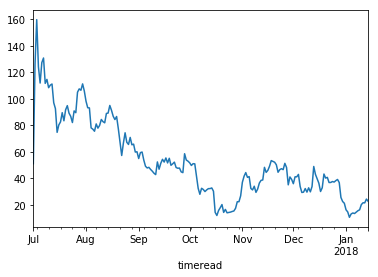

In [85]:

(eurodf['EOSXBT'] /eurodf['XXLMXXBT'] ).plot()

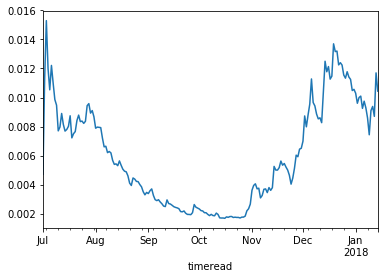

In [87]:
eurodf['EOSETH'].plot()

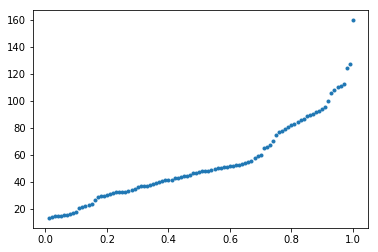

In [70]:
tmps = []
rangels = np.linspace(0.01, 1, num=100)
for i in list(rangels):
    arr = (eurodf['EOSXBT'] /eurodf['XXLMXXBT'] ).quantile(i)
    tmp = arr
    tmps.append(tmp)
plt.plot(rangels,tmps,'.')

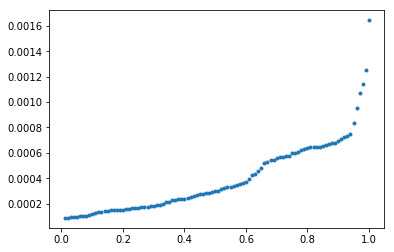

In [71]:
tmps = []
rangels = np.linspace(0.01, 1, num=100)
for i in list(rangels):
    arr = (eurodf['EOSXBT'] ).quantile(i)
    tmp = arr
    tmps.append(tmp)
plt.plot(rangels,tmps,'.')

In [46]:
eurodf['XXRPXXBT'].tail()

timeread
2018-01-10    0.000131
2018-01-11    0.000122
2018-01-12    0.000122
2018-01-13    0.000141
2018-01-14    0.000134
Name: XXRPXXBT, dtype: float64

In [40]:
(eurodf['XXRPXXBT'] /eurodf['XXLMXXBT'] ).quantile(i)

7.740267754836004

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2D69E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA78588>], dtype=object)

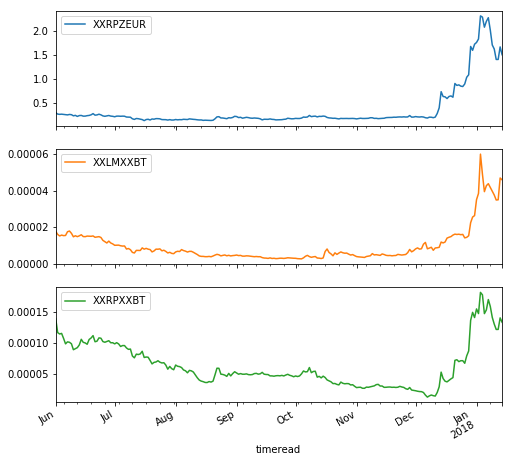

In [36]:
eurodf.plot(subplots=True,figsize=(8,8))